### Term Project
### DSC 530
### Abed Tabbalat
### Fall 2021

In [13]:
from __future__ import print_function, division
from scipy import stats
from estimation import RMSE, MeanError

%matplotlib inline

import numpy as np
import pandas as pd
import sys
import thinkplot
import thinkstats2
import analytic
import math
import scipy
import estimation
import scatter
import brfss
import hypothesis
import statsmodels.formula.api as smf
import regression
import random

    I will be using insurance data for this project, import shown below:

In [14]:
ins = pd.read_csv('DSC530_Exposure.csv')

In [15]:
ins.head()

,WPolicyNum,WLocNum,Company,Product,Subline,PM.Segment,Sub.Segment,Item.Segment,InceptDate,ExpireDate,...,Roof.Age,Customer_Segment,Distance_to_Coast_Range,Distance_to_Coast_Water_Type,Policy.Deductible.Percent,Months.Owner.Occupied,Loss.Of.Use.Deductible,Total Incurred,Total Ceded Premium,Total Premium
0,39-0011653388-9-1,0,3000,HO,HO4,Homeowners (NC&SC),FCIC_Homeowners_SC_HO4,NaN,8/30/2020 0:00,8/30/2021 0:00,...,NaN,,2001 feet to 2500 feet,NaN,0,0,0,0.0,50.924196,184.0
1,09-0016011670-8-1,0,3000,PHO,HO3,Homeowners - Pristine (FL),FCIC_Homeowners_Pristine_FL_HO3,NaN,9/18/2020 0:00,9/18/2021 0:00,...,1.0,Preferred,65 to 69.99 miles,NaN,0,0,0,0.0,191.071987,670.0
2,09-0016013861-0-1,0,3000,PHO,HO3,Homeowners - Pristine (FL),FCIC_Homeowners_Pristine_FL_HO3,NaN,10/15/2020 0:00,10/15/2021 0:00,...,6.0,Ultra Preferred,35 to 35.99 miles,NaN,0,0,0,0.0,258.990203,1038.0
3,09-0016027733-5-0,0,3000,PHO,HO3,Homeowners - Pristine (FL),FCIC_Homeowners_Pristine_FL_HO3,NaN,4/23/2020 0:00,4/23/2021 0:00,...,2.0,Ultra Preferred,2.3 to 2.39 miles,NaN,0,0,0,0.0,776.208957,1005.0
4,17-0016804295-7-0,0,8000,PHO,HO3,Homeowners - Pristine (LA),BSIC_Homeowners_Pristine_LA_HO3,NaN,4/28/2020 0:00,4/28/2021 0:00,...,12.0,Ultra Preferred,2.4 to 2.49 miles,NaN,0,0,0,0.0,2270.123433,3143.0


    Focusing on 5 variables in the dataset which will be, Product, State, Total Premium, Total Ceded Premium, and Total Incurred.

In [16]:
ins_5 = ins[['WPolicyNum', 'Product', 'Property.State', 'Total Premium', 'Total Ceded Premium', 'Total Incurred']]

In [17]:
ins_5 = ins_5.dropna()
ins_5.head()

,WPolicyNum,Product,Property.State,Total Premium,Total Ceded Premium,Total Incurred
0,39-0011653388-9-1,HO,SC,184.0,50.924196,0.0
1,09-0016011670-8-1,PHO,FL,670.0,191.071987,0.0
2,09-0016013861-0-1,PHO,FL,1038.0,258.990203,0.0
3,09-0016027733-5-0,PHO,FL,1005.0,776.208957,0.0
4,17-0016804295-7-0,PHO,LA,3143.0,2270.123433,0.0


    Will add a column that calculates the Net Margin which will be: (Premium - Ceded Premium - Incurred)

In [18]:
ins_5['Net_Margin'] = ins_5['Total Premium'] - ins_5['Total Ceded Premium'] - ins_5['Total Incurred']

In [19]:
ins_5.head()

,WPolicyNum,Product,Property.State,Total Premium,Total Ceded Premium,Total Incurred,Net_Margin
0,39-0011653388-9-1,HO,SC,184.0,50.924196,0.0,133.075804
1,09-0016011670-8-1,PHO,FL,670.0,191.071987,0.0,478.928013
2,09-0016013861-0-1,PHO,FL,1038.0,258.990203,0.0,779.009797
3,09-0016027733-5-0,PHO,FL,1005.0,776.208957,0.0,228.791043
4,17-0016804295-7-0,PHO,LA,3143.0,2270.123433,0.0,872.876567


In [20]:
ins_5.describe()

,Total Premium,Total Ceded Premium,Total Incurred,Net_Margin
count,61606.000000,61606.000000,61606.000000,61606.000000
mean,1335.774767,503.191193,312.599103,519.984471
std,954.691254,662.625698,5960.935003,5998.066606
min,50.000000,0.000000,0.000000,-681840.365307
25%,738.000000,158.640178,0.000000,382.996880
50%,1117.000000,334.110177,0.000000,678.022940
75%,1674.000000,600.751889,0.000000,1088.984121
max,23705.000000,16097.212900,682511.400000,11960.838568


Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers, and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

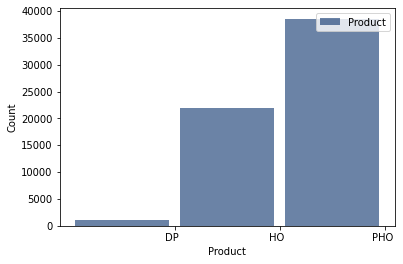

In [66]:
hist_p = thinkstats2.Hist(ins_5['Product'], label='Product')
thinkplot.Hist(hist_p)
thinkplot.Config(xlabel='Product', ylabel='Count')

        Histogram above shows that PHO product has the most amount of policies, this histogram would not identify any outliers.

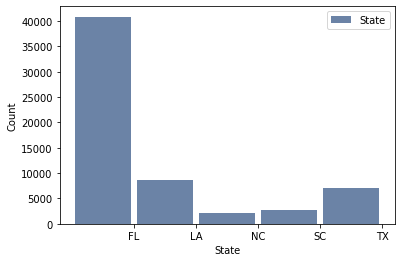

In [84]:
hist_st = thinkstats2.Hist(ins_5['Property.State'], label='State')
thinkplot.Hist(hist_st)
thinkplot.Config(xlabel='State', ylabel='Count')

    This histogram shows that the state of FL holds the most number of policies in the company.

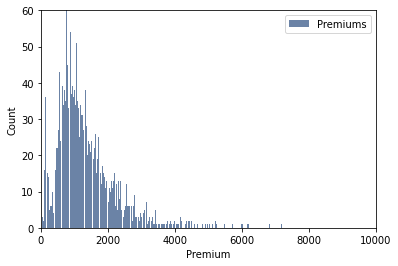

In [85]:
flr_prem = np.floor(ins_5['Total Premium'])
hist_prem = thinkstats2.Hist(flr_prem, label='Premiums')
thinkplot.Hist(hist_prem)
thinkplot.Config(xlabel='Premium', ylabel='Count', xlim=[0, 10000], ylim=[0, 60])

        There are a few outliers that I am observing which are high end homes with high amount of premiums that we can observe right below the 7,000 mark.

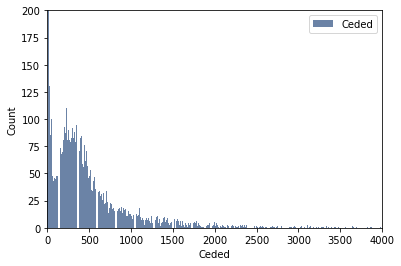

In [86]:
flr_ceded = np.floor(ins_5['Total Ceded Premium'])
hist_ceded = thinkstats2.Hist(flr_ceded, label='Ceded')
thinkplot.Hist(hist_ceded)
thinkplot.Config(xlabel='Ceded', ylabel='Count', xlim=[0, 4000], ylim=[0, 200])

    The main outlier in the ceded are the policies that are not subject to any reinsurance contract, hence we can see the highest count forms the policies that aren't counted.

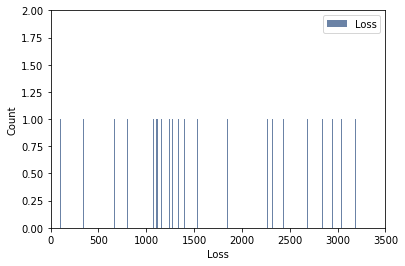

In [87]:
flr_loss = np.floor(ins_5['Total Incurred'])
hist_loss = thinkstats2.Hist(flr_loss, label='Loss')
thinkplot.Hist(hist_loss)
thinkplot.Config(xlabel='Loss', ylabel='Count', xlim=[0, 3500], ylim=[0, 2])

    This makes sense for losses as this is showing the count per policy on the amount of losses, since the data is in a chunk of a period of time, a policy can only file one claim and the amount of claims paid would move based on the loss amount.

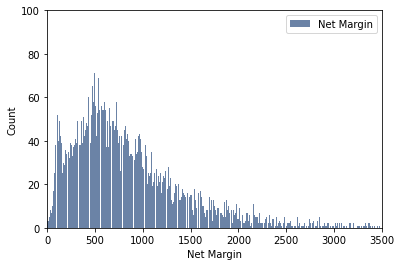

In [88]:
flr_net = np.floor(ins_5['Net_Margin'])
hist_net = thinkstats2.Hist(flr_net, label='Net Margin')
thinkplot.Hist(hist_net)
thinkplot.Config(xlabel='Net Margin', ylabel='Count', xlim=[0, 3500], ylim=[0, 100])

        Outliers here are going to be the policies that are not subject to reinsurance and have no losses which can show full profit from the premium. Most of the policies that are in the average of losses and reinsurance will profit about 500 per policy.

Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

    Will attempt a PMF on Total Premium between the Products HO and PHO.

In [89]:
ins_5_HO = ins_5[ins_5.Product == 'HO  ']
ins_5_PHO = ins_5[ins_5.Product == 'PHO ']

In [90]:
ho_prem_pmf = thinkstats2.Pmf(ins_5_HO['Total Premium'], label='HO')
pho_prem_pmf = thinkstats2.Pmf(ins_5_PHO['Total Premium'], label='PHO')

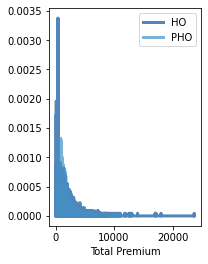

In [91]:
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([ho_prem_pmf, pho_prem_pmf])
thinkplot.Config(xlabel='Total Premium')

Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable, and how does it address the question you are trying to answer (Chapter 4).

In [92]:
ho_prem_cdf = thinkstats2.Cdf(ins_5_HO['Total Premium'], label='HO')
pho_prem_cdf = thinkstats2.Cdf(ins_5_PHO['Total Premium'], label='PHO')

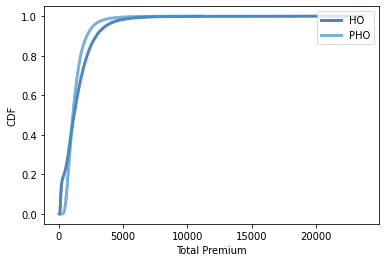

In [93]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([ho_prem_cdf, pho_prem_cdf])
thinkplot.Config(xlabel='Total Premium', ylabel='CDF')

Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

    Will attempt a lognormal model on Ceded Premiums.

In [94]:
def MakeNormalModel(ceded):

    cdf = thinkstats2.Cdf(ceded, label='ceded')

    mean, var = thinkstats2.TrimmedMeanVar(ceded)
    std = np.sqrt(var)
    print('n, mean, std', len(ceded), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

In [95]:
ins_ceded = ins_5['Total Ceded Premium'].dropna()

n, mean, std 61606 465.14541261801577 483.57437213047007


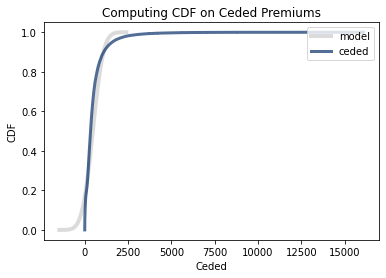

In [96]:
MakeNormalModel(ins_ceded)
thinkplot.Config(title='Computing CDF on Ceded Premiums', xlabel='Ceded',
                 ylabel='CDF', loc='upper right')

    The model is a good fit for the data, meaning every policy that gets issued will cede a portion of it.

Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear 

In [97]:
ins_prem = ins_5['Total Premium']
ins_loss = ins_5['Total Incurred']
inc_ceded = ins_5['Total Ceded Premium']

Scatter Plot for Premiums against Losses:

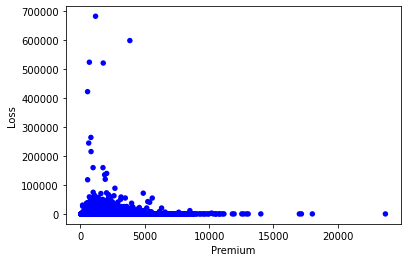

In [98]:
thinkplot.Scatter(ins_prem, ins_loss, alpha=1)
thinkplot.Config(xlabel='Premium',
                 ylabel='Loss')

Scatter Plot for Premiums against Ceded Premium:

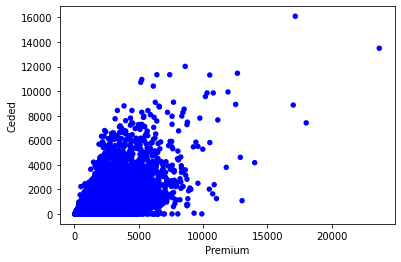

In [99]:
thinkplot.Scatter(ins_prem, ins_ceded, alpha=1)
thinkplot.Config(xlabel='Premium',
                 ylabel='Ceded')

In [100]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [101]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [102]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

Covariance, Correlation, and Spearman Correlation on Premiums vs Losses:

In [103]:
Cov(ins_prem, ins_loss)

74392.9096584277

    Positive coefficient means that more premiums we get, more losses will happen.

In [104]:
Corr(ins_prem, ins_loss)

0.01307257868157886

In [105]:
SpearmanCorr(ins_prem, ins_loss)

0.033853141733091965

    The covariance stated that a positive coefficient stating if premiums increase, losses will do the same. However, after running a correlation test and Spearman's correlation test, the result is 0.013 which is close to zero. Meaning, they're having more or less premiums doesnt mean that losses will happen. This makes sense as a company can have a year where they are shrinking and also having a bad weather year causing so many losses to occur. Or, growing the premiums where that year had no weather impacts that could affect those policies as much.

In [106]:
SpearmanCorr(ins_prem, ins_loss)

0.033853141733091965

    Covariance, Correlation, and Spearman Correlation on Premiums vs Ceded Premiums:

In [107]:
Cov(ins_prem, ins_ceded)

408984.7114696685

    Positive coefficient means that more premiums we get, more premium will be given to the reinsurer.

In [108]:
Corr(ins_prem, ins_ceded)

0.6465213999120649

In [109]:
SpearmanCorr(ins_prem, ins_ceded)

0.6305590457284703

    Correlation and Spearman's Correlation states that there is a positive relationship between premiums and what are given to the reinsurer. This makes sense because depending on the contract (and there could be more than one contract in place) the more premiums we are writing the more we are giving the reinsurer to protect us from exposure. Now the reason that the relationship isnt a full 1 is because some contracts would require a fixed monthly fee as opposed to others that are ceding a percentage of the premium. In addition, some policies maybe not subject to reinsurers which is also another factor.

Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

    Will conduct a Permutation Test.

In [110]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [111]:
ins_loss_ = ins_5_HO['Total Incurred'].values, ins_5_PHO['Total Incurred']

In [112]:
ht_loss = DiffMeansPermute(ins_loss_)
pvalue = ht_loss.PValue()
pvalue

0.278

    P value came at 27.8% which is plausible that the observed difference is the result from random sampling.

For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

    Will attempt a linear regression between Premiums Net Margin.

In [115]:
formula = 'ins_5["Total Premium"] ~ ins_5["Net_Margin"]'
model = smf.ols(formula, data=ins_5)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     ins_5["Total Premium"]   R-squared:                       0.006
Model:                                OLS   Adj. R-squared:                  0.006
Method:                     Least Squares   F-statistic:                     346.2
Date:                    Fri, 19 Nov 2021   Prob (F-statistic):           4.72e-77
Time:                            12:19:55   Log-Likelihood:            -5.0994e+05
No. Observations:                   61606   AIC:                         1.020e+06
Df Residuals:                       61604   BIC:                         1.020e+06
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1329.5880      3.850    345.345      0.000    1322.042    1337.134
ins_5["Net_Margin"]     0.0119      0.001     18.606      0.000       0.011       0.013
==============================================================================
Omnibus:                    40193.896   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1055019.631
Skew:                           2.740   Prob(JB):                         0.00
Kurtosis:                      22.519   Cond. No.                     6.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""